In [ ]:
def what_is_installed():
    import pycaret
    from pycaret import show_versions
    show_versions()
    import pycaret-ts-alpha
    from pycaret-ts-alpha import show_versions
    show_versions()

try:
    what_is_installed()
except:
    !pip install prophet
    !pip install pycaret-ts-alpha
    what_is_installed()

SyntaxError: invalid syntax (2550133949.py, line 3)

In [ ]:
pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached mlflow-1.30.0-py3-none-any.whl (17.0 MB)
  Using cached pandas_profiling-3.4.0-py2.py3-none-any.whl (315 kB)
  Using cached scipy-1.5.4-cp39-cp39-macosx_10_9_x86_64.whl (29.1 MB)
  Using cached spacy-2.3.8-cp39-cp39-macosx_10_9_x86_64.whl (5.2 MB)
  Using cached PyYAML-5.4.1-cp39-cp39-macosx_10_9_x86_64.whl (259 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [2519 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from numpy import log

In [ ]:
import os
import sys
import datetime as dt
#import missingno as mno 

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

LOAD DATA
--

In [ ]:
# Read the data into pandas DataFrames
may = pd.read_csv("MeasurementMay2022.csv")
june = pd.read_csv("Measurementjune2022(1).csv")
july = pd.read_csv("MeasurementsJuly2022.csv")
aug = pd.read_csv("MeasurementAugust2022.csv")


In [ ]:
may = may[may['data_date']!='01/06/2022']
june = june[june['data_date']!='01/07/2022']
july = july[july['data_date']!='01/08/2022']


In [ ]:
df= pd.concat([may,june,july,aug], axis=0)

In [ ]:
df.tail()

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
4567                    83.5                       0.7   
4568                    62.5                       0.9   
4569                    96.0                       1.1   
4570                    79.8                       1.2   
4571                    94.9                       1.3   

      Magna_6 Meteo Ambient Temperature (C)  Magna_6 Meteo Air Pressure (hpa)  \
4567                                   11.5                             996.4   
4568                                   11.7                             996.3   
4569                                   11.7                             996.2   
4570                                   11.7                             996.1   
4571                                   11.8                             996.0   

      Magna_6 Meteo Relative Humidity  \
4567                             95.7   
4568                             95.4   
4569                             95.3   
4570                             95.2   
4571                             94.9   

      Magna_6 Meteo Dew Point Temperature (C)  Power Supply (V)  \
4567                                     10.9            13.115   
4568                                     11.0            13.115   
4569                                     11.0            13.115   
4570                                     11.0            13.115   
4571                                     11.0            13.103   

      Magna_6 Water EC muS/cm  Magna_6 Water Level Above Sensor mm  \
4567                    299.1                               1460.2   
4568                    299.2                               1460.1   
4569                    299.3                               1460.2   
4570                    299.2                               1460.1   
4571                    299.2                               1460.1   

      Magna_6 Segment 1_ (10-30cm) Soil Moisture_%  ...  \
4567                                         59.56  ...   
4568                                         59.56  ...   
4569                                         59.58  ...   
4570                                         59.60  ...   
4571                                         59.59  ...   

      Dew Point Temperature (x10)  Magna_6 Precipitation_24hr_mm  \
4567                          109                              0   
4568                          110                              0   
4569                          110                              0   
4570                          110                              0   
4571                          110                              0   

      Magna_6 Cumulative Precipitation_mm  Magna_6 CTD_Temperature_C  \
4567                                 1006                  10.488342   
4568                                 1006                  10.488342   
4569                                 1006                  10.488342   
4570                                 1006                  10.488342   
4571                                 1006                  10.488342   

      CTD_Pressure_BAR  CTD_Conductivity__mS  Metres above MSL  TOW _MH2O  \
4567          0.143201              0.299075            206.04       0.99   
4568          0.143191              0.299199            206.04       0.99   
4569          0.143194              0.299323            206.04       0.99   
4570          0.143187              0.299199            206.04       0.99   
4571          0.143183              0.299199            206.04       0.99   

       data_date  data_time  
4567  01/09/2022   23:18:00  
4568  01/09/2022   23:28:00  
4569  01/09/2022   23:38:00  
4570  01/09/2022   23:48:00  
4571  01/09/2022   23:58:00  

[5 rows x 36 columns]

In [ ]:
df['date']=pd.to_datetime(df['data_date'] +" "+ df['data_time'],
               errors='raise',
                   utc="ns",
                   exact=True,
                   unit=None,
               format="%d/%m/%Y %H:%M:%S",
                   infer_datetime_format=True,
                   origin='unix', cache=True)

In [ ]:
df.tail()

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
4567                    83.5                       0.7   
4568                    62.5                       0.9   
4569                    96.0                       1.1   
4570                    79.8                       1.2   
4571                    94.9                       1.3   

      Magna_6 Meteo Ambient Temperature (C)  Magna_6 Meteo Air Pressure (hpa)  \
4567                                   11.5                             996.4   
4568                                   11.7                             996.3   
4569                                   11.7                             996.2   
4570                                   11.7                             996.1   
4571                                   11.8                             996.0   

      Magna_6 Meteo Relative Humidity  \
4567                             95.7   
4568                             95.4   
4569                             95.3   
4570                             95.2   
4571                             94.9   

      Magna_6 Meteo Dew Point Temperature (C)  Power Supply (V)  \
4567                                     10.9            13.115   
4568                                     11.0            13.115   
4569                                     11.0            13.115   
4570                                     11.0            13.115   
4571                                     11.0            13.103   

      Magna_6 Water EC muS/cm  Magna_6 Water Level Above Sensor mm  \
4567                    299.1                               1460.2   
4568                    299.2                               1460.1   
4569                    299.3                               1460.2   
4570                    299.2                               1460.1   
4571                    299.2                               1460.1   

      Magna_6 Segment 1_ (10-30cm) Soil Moisture_%  ...  \
4567                                         59.56  ...   
4568                                         59.56  ...   
4569                                         59.58  ...   
4570                                         59.60  ...   
4571                                         59.59  ...   

      Magna_6 Precipitation_24hr_mm  Magna_6 Cumulative Precipitation_mm  \
4567                              0                                 1006   
4568                              0                                 1006   
4569                              0                                 1006   
4570                              0                                 1006   
4571                              0                                 1006   

      Magna_6 CTD_Temperature_C  CTD_Pressure_BAR  CTD_Conductivity__mS  \
4567                  10.488342          0.143201              0.299075   
4568                  10.488342          0.143191              0.299199   
4569                  10.488342          0.143194              0.299323   
4570                  10.488342          0.143187              0.299199   
4571                  10.488342          0.143183              0.299199   

      Metres above MSL  TOW _MH2O   data_date  data_time  \
4567            206.04       0.99  01/09/2022   23:18:00   
4568            206.04       0.99  01/09/2022   23:28:00   
4569            206.04       0.99  01/09/2022   23:38:00   
4570            206.04       0.99  01/09/2022   23:48:00   
4571            206.04       0.99  01/09/2022   23:58:00   

                          date  
4567 2022-09-01 23:18:00+00:00  
4568 2022-09-01 23:28:00+00:00  
4569 2022-09-01 23:38:00+00:00  
4570 2022-09-01 23:48:00+00:00  
4571 2022-09-01 23:58:00+00:00  

[5 rows x 37 columns]

In [ ]:
df.set_index("date", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17809 entries, 2022-05-01 00:02:00+00:00 to 2022-09-01 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Magna_6 Wind Direction                                           17809 non-null  float64
 1   Magna_6 Wind Speed (m/s)                                         17809 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)                            17809 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)                                 17809 non-null  float64
 4   Magna_6 Meteo Relative Humidity                                  17809 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)                          17809 non-null  float64
 6   Power Supply (V)                                                 17809 non-null  float6

In [ ]:
df.isnull().sum()

Magna_6 Wind Direction                                             0
Magna_6 Wind Speed (m/s)                                           0
Magna_6 Meteo Ambient Temperature (C)                              0
Magna_6 Meteo Air Pressure (hpa)                                   0
Magna_6 Meteo Relative Humidity                                    0
Magna_6 Meteo Dew Point Temperature (C)                            0
Power Supply (V)                                                   0
Magna_6 Water EC muS/cm                                            0
Magna_6 Water Level Above Sensor mm                                0
Magna_6 Segment 1_ (10-30cm) Soil Moisture_%                       0
Temp_1                                                             0
Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m     0
Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%                      0
Temp_2                                                             0
Magna_6 Segment 2_ (40-60 cm) Soil

In [ ]:
#rename columns with protacted name strings as well as the time and date column
df= df.rename(columns= {
                       "Magna_6 Segment 1_ (10-30cm) Soil Moisture_%":"segment1(10-30cm)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%":"segment2(40-60cm)",
                       "Magna_6 Segment 3_ (70-90 cm) Soil Moisture_%":"segment3(70-90cm)",
                       "Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m":"segment1(EC)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Electrical Conductivity__S/m":"segment2(EC)",
                        "Magna_6 Segment 3_ (70-90 cm) Soil Electrical Conductivity__S/m":"segment3(EC)"
                       })
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17809 entries, 2022-05-01 00:02:00+00:00 to 2022-09-01 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   17809 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 17809 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    17809 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         17809 non-null  float64
 4   Magna_6 Meteo Relative Humidity          17809 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  17809 non-null  float64
 6   Power Supply (V)                         17809 non-null  float64
 7   Magna_6 Water EC muS/cm                  17809 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      17809 non-null  float64
 9   segment1(10-30cm)                        17809 non-null  float64
 10 

In [ ]:
df.tail()

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
date                                                                          
2022-09-01 23:18:00+00:00                    83.5                       0.7   
2022-09-01 23:28:00+00:00                    62.5                       0.9   
2022-09-01 23:38:00+00:00                    96.0                       1.1   
2022-09-01 23:48:00+00:00                    79.8                       1.2   
2022-09-01 23:58:00+00:00                    94.9                       1.3   

                           Magna_6 Meteo Ambient Temperature (C)  \
date                                                               
2022-09-01 23:18:00+00:00                                   11.5   
2022-09-01 23:28:00+00:00                                   11.7   
2022-09-01 23:38:00+00:00                                   11.7   
2022-09-01 23:48:00+00:00                                   11.7   
2022-09-01 23:58:00+00:00                                   11.8   

                           Magna_6 Meteo Air Pressure (hpa)  \
date                                                          
2022-09-01 23:18:00+00:00                             996.4   
2022-09-01 23:28:00+00:00                             996.3   
2022-09-01 23:38:00+00:00                             996.2   
2022-09-01 23:48:00+00:00                             996.1   
2022-09-01 23:58:00+00:00                             996.0   

                           Magna_6 Meteo Relative Humidity  \
date                                                         
2022-09-01 23:18:00+00:00                             95.7   
2022-09-01 23:28:00+00:00                             95.4   
2022-09-01 23:38:00+00:00                             95.3   
2022-09-01 23:48:00+00:00                             95.2   
2022-09-01 23:58:00+00:00                             94.9   

                           Magna_6 Meteo Dew Point Temperature (C)  \
date                                                                 
2022-09-01 23:18:00+00:00                                     10.9   
2022-09-01 23:28:00+00:00                                     11.0   
2022-09-01 23:38:00+00:00                                     11.0   
2022-09-01 23:48:00+00:00                                     11.0   
2022-09-01 23:58:00+00:00                                     11.0   

                           Power Supply (V)  Magna_6 Water EC muS/cm  \
date                                                                   
2022-09-01 23:18:00+00:00            13.115                    299.1   
2022-09-01 23:28:00+00:00            13.115                    299.2   
2022-09-01 23:38:00+00:00            13.115                    299.3   
2022-09-01 23:48:00+00:00            13.115                    299.2   
2022-09-01 23:58:00+00:00            13.103                    299.2   

                           Magna_6 Water Level Above Sensor mm  \
date                                                             
2022-09-01 23:18:00+00:00                               1460.2   
2022-09-01 23:28:00+00:00                               1460.1   
2022-09-01 23:38:00+00:00                               1460.2   
2022-09-01 23:48:00+00:00                               1460.1   
2022-09-01 23:58:00+00:00                               1460.1   

                           segment1(10-30cm)  ...  \
date                                          ...   
2022-09-01 23:18:00+00:00              59.56  ...   
2022-09-01 23:28:00+00:00              59.56  ...   
2022-09-01 23:38:00+00:00              59.58  ...   
2022-09-01 23:48:00+00:00              59.60  ...   
2022-09-01 23:58:00+00:00              59.59  ...   

                           Dew Point Temperature (x10)  \
date                                                     
2022-09-01 23:18:00+00:00                          109   
2022-09-01 23:28:00+00:00                          110   
2022-09-01 23:38:00+00:00                          110  

In [ ]:
df.index

DatetimeIndex(['2022-05-01 00:02:00+00:00', '2022-05-01 00:12:00+00:00',
               '2022-05-01 00:22:00+00:00', '2022-05-01 00:32:00+00:00',
               '2022-05-01 00:42:00+00:00', '2022-05-01 00:52:00+00:00',
               '2022-05-01 01:02:00+00:00', '2022-05-01 01:12:00+00:00',
               '2022-05-01 01:22:00+00:00', '2022-05-01 01:32:00+00:00',
               ...
               '2022-09-01 22:28:00+00:00', '2022-09-01 22:38:00+00:00',
               '2022-09-01 22:48:00+00:00', '2022-09-01 22:58:00+00:00',
               '2022-09-01 23:08:00+00:00', '2022-09-01 23:18:00+00:00',
               '2022-09-01 23:28:00+00:00', '2022-09-01 23:38:00+00:00',
               '2022-09-01 23:48:00+00:00', '2022-09-01 23:58:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=17809, freq=None)

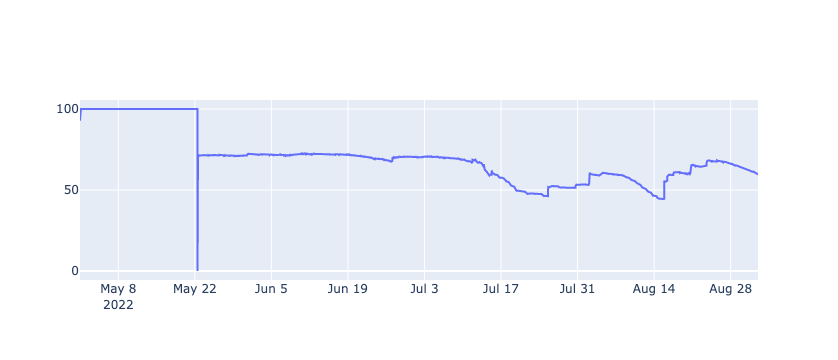

In [ ]:
import plotly.graph_objects as go
fig1 = go.Figure(go.Scatter(x=df.index, y=df["segment1(10-30cm)"]))

fig1.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17809 entries, 2022-05-01 00:02:00+00:00 to 2022-09-01 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   17809 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 17809 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    17809 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         17809 non-null  float64
 4   Magna_6 Meteo Relative Humidity          17809 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  17809 non-null  float64
 6   Power Supply (V)                         17809 non-null  float64
 7   Magna_6 Water EC muS/cm                  17809 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      17809 non-null  float64
 9   segment1(10-30cm)                        17809 non-null  float64
 10 

In [ ]:
### !!!!! CHECK!! If removing rows from the dataseet, doesnt this create a problem in the consistency of my timeline
## !!!!Should I instead replace it with mean of the previous readings ??????????

#19/04/2022	Installation on site
#22/05/2022	Problem with moisture probe – removed and cleaned
#22/05/2022	pH meter removed
#12/06/2022	New and old pH probe installed 
#06/07/2022	Testing pH first try
#27/07/2022	Testing pH second try
#13/08/2022	Changed batteries – data slave
#19/09/2022	Made changes to pH and conductivity sensor – old/new swap

##df[df.data_date != '19/05/2022']
## delete the above dates as required in the readme file provided

df.drop(df[df['data_date'] == '19/05/2022'].index, inplace=True)
df.drop(df[df['data_date'] == '22/05/2022'].index, inplace=True)

In [ ]:
## replace no-data with column mean
df['Metres above MSL'] = df['Metres above MSL'].replace(['no-data'],0.0)
df['TOW _MH2O'] = df['TOW _MH2O'].replace(['no-data'],0.0)

In [ ]:
df[df['Metres above MSL']== "no-data"]

Empty DataFrame
Columns: [Magna_6 Wind Direction, Magna_6 Wind Speed (m/s), Magna_6 Meteo Ambient Temperature (C), Magna_6 Meteo Air Pressure (hpa), Magna_6 Meteo Relative Humidity, Magna_6 Meteo Dew Point Temperature (C), Power Supply (V), Magna_6 Water EC muS/cm, Magna_6 Water Level Above Sensor mm, segment1(10-30cm), Temp_1, segment1(EC), segment2(40-60cm), Temp_2, segment2(EC), segment3(70-90cm), Temp_3, segment3(EC), Magna_6 PH, Magna_6 ORP_mV, Magna_6 pH_Sensor_Temperature_C, Wind Speed (x10), Wind Direction (x10), Temperature (x10), Air Pressure (x10), Relative Humidity (x10), Dew Point Temperature (x10), Magna_6 Precipitation_24hr_mm, Magna_6 Cumulative Precipitation_mm, Magna_6 CTD_Temperature_C, CTD_Pressure_BAR, CTD_Conductivity__mS, Metres above MSL, TOW _MH2O, data_date, data_time]
Index: []

[0 rows x 36 columns]

In [ ]:
#convert string to float
df['Metres above MSL'] = pd.to_numeric(df['Metres above MSL'])#.astype(float)
df['TOW _MH2O'] = pd.to_numeric(df['TOW _MH2O'])#.astype(float)

In [ ]:
## check the dataframe

In [ ]:
del df['Temp_2']

del df['Temp_1']

del df['Temp_3']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17809 entries, 2022-05-01 00:02:00+00:00 to 2022-09-01 23:58:00+00:00
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   17809 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 17809 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    17809 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         17809 non-null  float64
 4   Magna_6 Meteo Relative Humidity          17809 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  17809 non-null  float64
 6   Power Supply (V)                         17809 non-null  float64
 7   Magna_6 Water EC muS/cm                  17809 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      17809 non-null  float64
 9   segment1(10-30cm)                        17809 non-null  float64
 10 

In [ ]:
#std of columns
std_dev=df.loc['22-05-21':'22-05-23'].std().sort_values(ascending=False)
std_dev

Wind Direction (x10)                       873.205958
Magna_6 Water Level Above Sensor mm        286.765444
Magna_6 Cumulative Precipitation_mm        278.008014
Magna_6 ORP_mV                             191.519427
Relative Humidity (x10)                    128.232764
Magna_6 Wind Direction                      87.320596
Air Pressure (x10)                          71.714203
Magna_6 Water EC muS/cm                     57.174504
Metres above MSL                            56.922959
Temperature (x10)                           40.160451
Dew Point Temperature (x10)                 27.748804
segment1(10-30cm)                           15.605017
Wind Speed (x10)                            15.128715
Magna_6 Meteo Relative Humidity             12.823276
Magna_6 Precipitation_24hr_mm                9.207578
Magna_6 Meteo Air Pressure (hpa)             7.171420
segment2(40-60cm)                            6.141835
segment3(70-90cm)                            4.491078
Magna_6 Meteo Ambient Temper

In [ ]:
variance=df.loc['22-05-21':'22-09-01'].var().sort_values(ascending=False)
variance

Magna_6 Wind Direction                     NaN
Magna_6 Wind Speed (m/s)                   NaN
Magna_6 Meteo Ambient Temperature (C)      NaN
Magna_6 Meteo Air Pressure (hpa)           NaN
Magna_6 Meteo Relative Humidity            NaN
Magna_6 Meteo Dew Point Temperature (C)    NaN
Power Supply (V)                           NaN
Magna_6 Water EC muS/cm                    NaN
Magna_6 Water Level Above Sensor mm        NaN
segment1(10-30cm)                          NaN
segment1(EC)                               NaN
segment2(40-60cm)                          NaN
segment2(EC)                               NaN
segment3(70-90cm)                          NaN
segment3(EC)                               NaN
Magna_6 PH                                 NaN
Magna_6 ORP_mV                             NaN
Magna_6 pH_Sensor_Temperature_C            NaN
Wind Speed (x10)                           NaN
Wind Direction (x10)                       NaN
Temperature (x10)                          NaN
Air Pressure 

In [ ]:
#compare variance from all 3 segments


In [ ]:
segment1_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'].var()
segment2_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment2(40-60cm)'].var()
segment3_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment3(70-90cm)'].var()
print("segment1: ", segment1_var )
print("segment2: ", segment2_var )
print("segment3: ", segment3_var )

segment1:  69.96536946287254
segment2:  7.063799724882729
segment3:  4.95920416335297


In [ ]:
segment1_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'].std()
segment2_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment2(40-60cm)'].std()
segment3_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment3(70-90cm)'].std()
print("segment1: ", segment1_std )
print("segment2: ", segment2_std )
print("segment3: ", segment3_std )

segment1:  8.364530438875367
segment2:  2.6577809775981787
segment3:  2.2269270673627752


<AxesSubplot:xlabel='segment1(10-30cm)', ylabel='Density'>

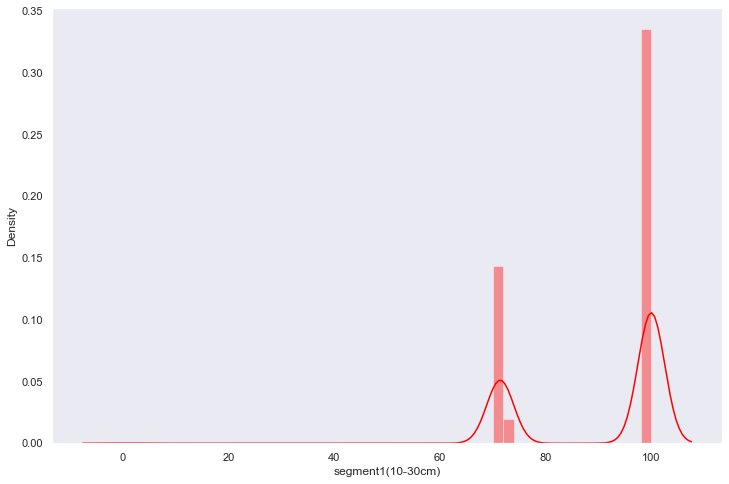

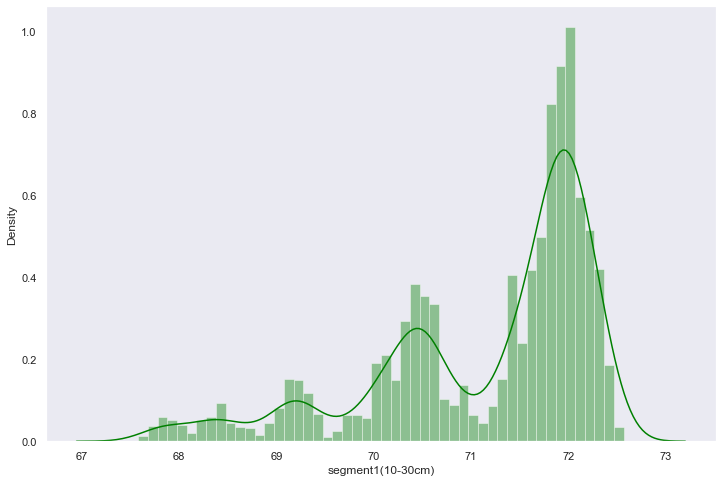

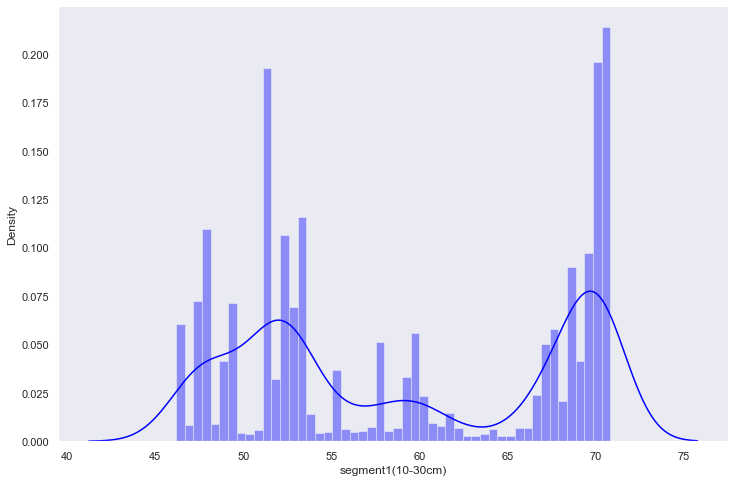

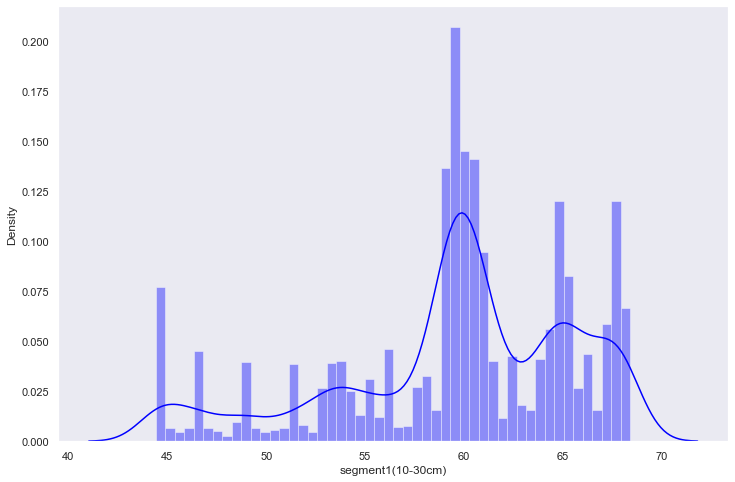

In [ ]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="dark", color_codes=True)
#Compare the deviation for the last 4 months
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-05-01 00:02:00+00:00':'2022-06-01 23:58:00+00:00']['segment1(10-30cm)'], 
            color= 'red',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-06-01 00:02:00+00:00':'2022-07-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'green',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-07-01 00:02:00+00:00':'2022-08-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'blue',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-08-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'blue',
            bins = 50)

In [ ]:
# remove the date and time column
del df['data_date']

del df['data_time']

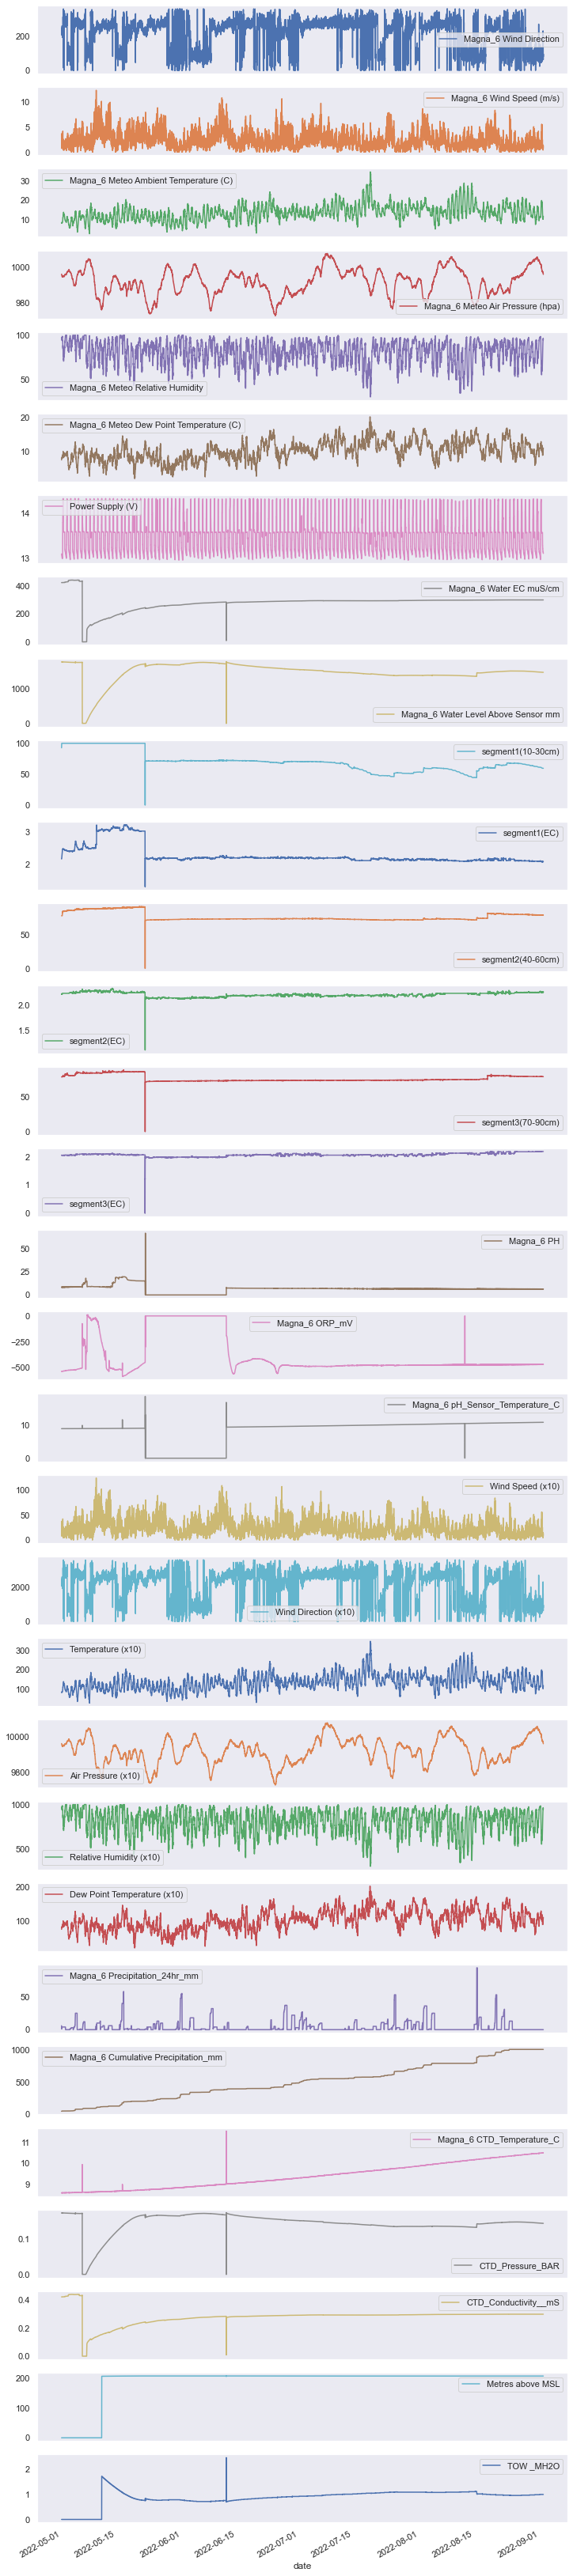

In [ ]:
df.plot(subplots=True, figsize=(12,65));

In [ ]:
#remove columns for segment 2 and 3
del df['segment2(40-60cm)']
del df['segment3(70-90cm)']
del df['segment2(EC)']
del df['segment3(EC)']

In [ ]:
#df.index
future_data = df.iloc[-7000:]
future_data

Magna_6 Wind Direction  Magna_6 Wind Speed (m/s)  \
date                                                                          
2022-07-15 03:28:00+00:00                   266.3                       1.8   
2022-07-15 03:38:00+00:00                   278.9                       2.4   
2022-07-15 03:48:00+00:00                   275.7                       1.5   
2022-07-15 03:58:00+00:00                   269.9                       1.4   
2022-07-15 04:08:00+00:00                   251.6                       2.2   
...                                           ...                       ...   
2022-09-01 23:18:00+00:00                    83.5                       0.7   
2022-09-01 23:28:00+00:00                    62.5                       0.9   
2022-09-01 23:38:00+00:00                    96.0                       1.1   
2022-09-01 23:48:00+00:00                    79.8                       1.2   
2022-09-01 23:58:00+00:00                    94.9                       1.3   

                           Magna_6 Meteo Ambient Temperature (C)  \
date                                                               
2022-07-15 03:28:00+00:00                                   12.2   
2022-07-15 03:38:00+00:00                                   12.2   
2022-07-15 03:48:00+00:00                                   12.3   
2022-07-15 03:58:00+00:00                                   12.3   
2022-07-15 04:08:00+00:00                                   12.5   
...                                                          ...   
2022-09-01 23:18:00+00:00                                   11.5   
2022-09-01 23:28:00+00:00                                   11.7   
2022-09-01 23:38:00+00:00                                   11.7   
2022-09-01 23:48:00+00:00                                   11.7   
2022-09-01 23:58:00+00:00                                   11.8   

                           Magna_6 Meteo Air Pressure (hpa)  \
date                                                          
2022-07-15 03:28:00+00:00                             997.3   
2022-07-15 03:38:00+00:00                             997.2   
2022-07-15 03:48:00+00:00                             997.2   
2022-07-15 03:58:00+00:00                             997.2   
2022-07-15 04:08:00+00:00                             997.2   
...                                                     ...   
2022-09-01 23:18:00+00:00                             996.4   
2022-09-01 23:28:00+00:00                             996.3   
2022-09-01 23:38:00+00:00                             996.2   
2022-09-01 23:48:00+00:00                             996.1   
2022-09-01 23:58:00+00:00                             996.0   

                           Magna_6 Meteo Relative Humidity  \
date                                                         
2022-07-15 03:28:00+00:00                             87.7   
2022-07-15 03:38:00+00:00                             87.3   
2022-07-15 03:48:00+00:00                             86.6   
2022-07-15 03:58:00+00:00                             86.4   
2022-07-15 04:08:00+00:00                             85.3   
...                                                    ...   
2022-09-01 23:18:00+00:00                             95.7   
2022-09-01 23:28:00+00:00                             95.4   
2022-09-01 23:38:00+00:00                             95.3   
2022-09-01 23:48:00+00:00                             95.2   
2022-09-01 23:58:00+00:00                             94.9   

                           Magna_6 Meteo Dew Point Temperature (C)  \
date                                                                 
2022-07-15 03:28:00+00:00                                     10.3   
2022-07-15 03:38:00+00:00                                     10.2   
2022-07-15 03:48:00+00:00                                     10.1   
2022-07-15 03:58:00+00:00                                     10.1   
2022-07-15 04:08:00+00:00                                     10.1 

In [ ]:
from pycaret.time_series import *

# Change renderer appropriately based on where the notebook is being run ----
# Refer to plotly for available renderers.
global_plot_settings = {"renderer": "colab",
                        "hoverinfo": "text"}
# init environment
from pycaret.regression import *
exp = TSForecastingExperiment()
target = 'segment1(10-30cm)'
data_for_modeling = df[df.index < '2022-08-21'].reset_index(drop = True)
future_df = df[df.index >= '2022-08-21'].reset_index(drop = True)
future_exog = future_df.drop(columns=target)

exp.setup(data = data_for_modeling,
          target= target,
          seasonal_period=12,
          fh=1000,
          fig_kwargs=global_plot_settings,
          session_id=142)


AttributeError: 'Series' object has no attribute 'drop_index'

In [ ]:
future_df.count()

Magna_6 Wind Direction                     1716
Magna_6 Wind Speed (m/s)                   1716
Magna_6 Meteo Ambient Temperature (C)      1716
Magna_6 Meteo Air Pressure (hpa)           1716
Magna_6 Meteo Relative Humidity            1716
Magna_6 Meteo Dew Point Temperature (C)    1716
Power Supply (V)                           1716
Magna_6 Water EC muS/cm                    1716
Magna_6 Water Level Above Sensor mm        1716
segment1(10-30cm)                          1716
segment1(EC)                               1716
Magna_6 PH                                 1716
Magna_6 ORP_mV                             1716
Magna_6 pH_Sensor_Temperature_C            1716
Wind Speed (x10)                           1716
Wind Direction (x10)                       1716
Temperature (x10)                          1716
Air Pressure (x10)                         1716
Relative Humidity (x10)                    1716
Dew Point Temperature (x10)                1716
Magna_6 Precipitation_24hr_mm           

In [ ]:
# Additional plots provided by PyCaret to help understand what is being done.
exp.plot_model(plot="train_test_split")

In [ ]:
#.plot_model(plot="cv")

In [ ]:
#Model training and selection
print("Model training and selection")
best_model = exp.compare_models(sort = 'MAE')

Model training and selection


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

In [ ]:
exp.plot_model(best_model,
               plot = 'forecast')

In [ ]:
# Diagnostics plot
exp.plot_model(plot = 'diagnostics')

In [ ]:
tuned= exp.tune_model(best_model,fold=5)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.5s finished


In [ ]:
# forecast in unknown future
exp.plot_model(tuned,
               plot = 'forecast',
               data_kwargs = {'fh' : 1716})

In [ ]:
# Diagnostics plot
exp.plot_model(tuned, plot = 'diagnostics')

In [ ]:
# finalize model
final_best = exp.finalize_model(tuned)
print(final_best)

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=12))]))])


0       65.44
1       65.41
2       65.45
3       65.44
4       65.42
        ...  
1711    59.56
1712    59.56
1713    59.58
1714    59.60
1715    59.59
Name: segment1(10-30cm), Length: 1716, dtype: float64


In [ ]:
# generate predictions
preds= exp.predict_model(final_best,fh=1716,X=future_exog)
print(preds)

       y_pred
16093   65.49
16094   65.51
16095   65.48
16096   65.48
16097   65.47
...       ...
17804   65.50
17805   65.50
17806   65.46
17807   65.43
17808   65.44

[1716 rows x 1 columns]


In [ ]:
y_train= data_for_modeling['segment1(10-30cm)']
#y_train=exp.get_config("y_train")
print(y_train)

0        92.72
1        94.61
2        94.57
3        95.82
4        97.30
         ...  
16088    65.50
16089    65.50
16090    65.46
16091    65.43
16092    65.44
Name: segment1(10-30cm), Length: 16093, dtype: float64


In [ ]:
data=df['segment1(10-30cm)'].reset_index(drop=True)

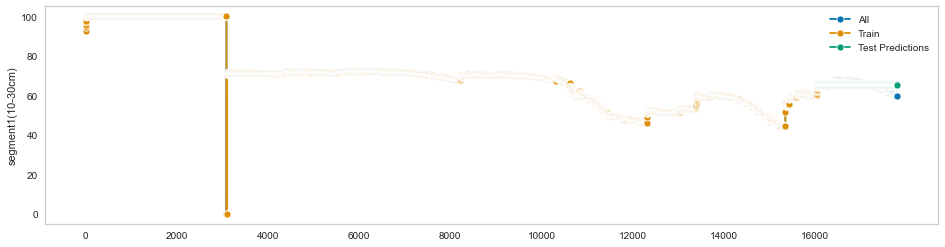

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(data,
            y_train,
            preds,
            labels=['All', 'Train', 'Test Predictions'])
plt.grid()

In [ ]:
# Analyse best model
print('Analyse best model')
exp.evaluate_model(final_best)

Analyse best model


ValueError: <class 'bool'> cannot be transformed to a widget

In [ ]:
# save the model
exp.save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 NaiveForecaster(sp=12))]))]))]))]),
 'my_best_model.pkl')

In [ ]:
# NOTE: We will work on in-sample residuals that are provided by PyCaret automatically
# But if you need out of sample residuals, you can get them like this.
xresiduals = exp.get_config("y_test") - prediction
xresiduals

Feature Selection
## __

In [ ]:
#Building and displaying Correlation Matrix
corrMatrix = df.corr()
#print(corrMatrix)

_,ax=plt.subplots(1,1,figsize=(20,20))
sn.heatmap(df.corr(),annot=True, ax=ax,fmt='.2g', cbar=False)


In [ ]:
x = df.corr()
highly_corr = {}
for columns in x.columns:
  highly_corr[columns] = list(x[columns][x[columns]> 0.6].index)
#print(x['Air Pressure (x10)'][x['Air Pressure (x10)']> 0.5].index)

In [ ]:
highly_corr

In [ ]:
df.head()

In [ ]:
#Variance Threshold 

In [ ]:
from sklearn.feature_selection import VarianceThreshold 


#dfTreshold = df
# we are making a copy of dataframe and assigning to new variable 
# instead of pointing a new variable through the memory of the old file
dfTreshold = df.copy()

dfTreshold.info()

In [ ]:
VarThresh = VarianceThreshold(threshold = 0.8)
VarThresh.fit(dfTreshold)
VarThresh.get_support()

## All useless columns are False 

In [ ]:
# VIF -
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe

vif_data = df.copy()
del vif_data['segment1(10-30cm)']
X = df[df.columns]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
X

In [ ]:
## cut off treshhold
vif_data.sort_values(by='VIF', ascending = False)